In [36]:
from app.environment.dataprovider import DataProvider
import os
import numpy as np
import pandas as pd

In [37]:
api_key = os.getenv('TIINGO_API_KEY')
start_date = '2000-01-01'
end_date = '2021-12-31'
provider = DataProvider(api_key)

In [103]:
data = provider.load('NVDA', start_date, end_date)
data = data[['date', 'adj_open', 'adj_close']].copy()
data['intraday_change'] = (data['adj_close'] / data['adj_open']) - 1.0
data['afterday_change'] = ((data['adj_open'].shift(-1) / data['adj_close']) - 1.0).fillna(0.0)
data['next_intraday_change'] = data['intraday_change'].shift(-1).fillna(0.0)
data['weekday'] = data['date'].dt.weekday
data['total_change'] = data['intraday_change'] * (data['afterday_change'] + 1.0) * (data['next_intraday_change'] + 1.0)
data['after_change'] = data['intraday_change'] * (data['afterday_change'] + 1.0)
data['next_change'] = data['afterday_change'] * (data['next_intraday_change'] + 1.0)
data['next_after_change'] = data['intraday_change'] * (data['afterday_change'] + 1.0)

In [104]:
def calculate_weekday(data, weekday, short=20, long=52, change='next_change'):
    day = data[data['weekday'] == weekday].copy()
    day['sma_short'] = day[change].rolling(short).mean()
    day['stdev_short'] = day[change].rolling(short).std()
    day['upper_short'] = day['sma_short'] + day['stdev_short'] 
    day['lower_short'] = day['sma_short'] - day['stdev_short'] 
    day['sma_long'] = day[change].rolling(long).mean()
    day['stdev_long'] = day[change].rolling(short).std()
    day['upper_long'] = day['sma_long'] + day['stdev_long'] 
    day['lower_long'] = day['sma_long'] - day['stdev_long'] 
    return day

def plot_weekday(days, name, line='long'):
    ax = days['adj_close'].plot(figsize=(20, 10), title=name)
    ax2 = days[[f'sma_{line}', f'upper_{line}', f'lower_{line}']].plot(ax=ax, secondary_y=True)
    ax2.hlines(0, ax2.get_xticks().min(), ax2.get_xticks().max(), linestyle='--', color='pink')

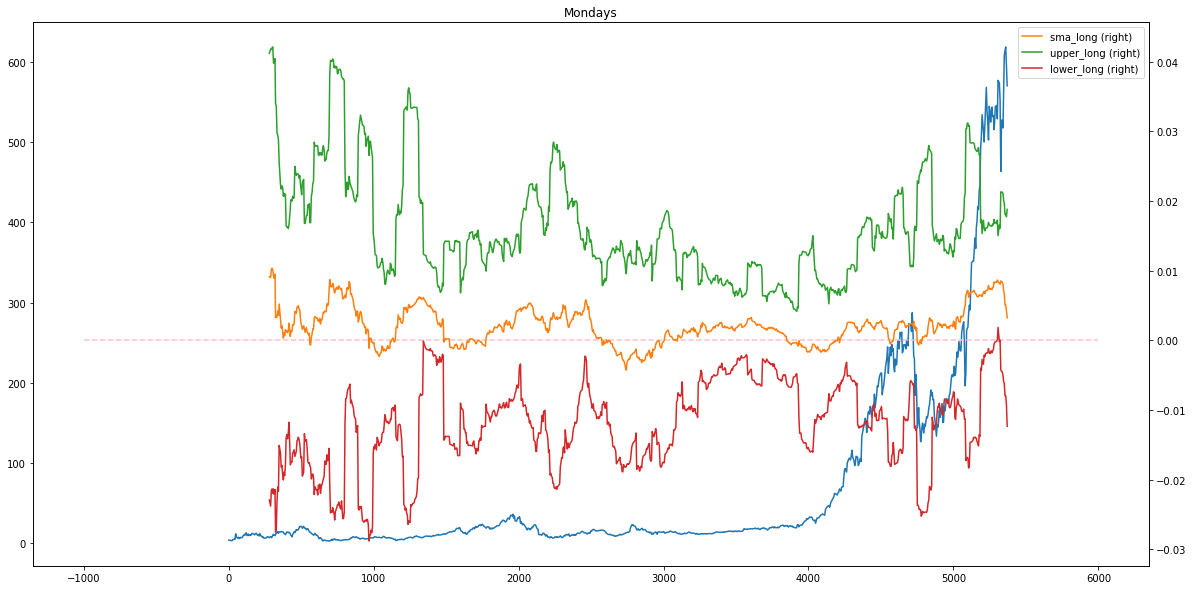

In [105]:
plot_weekday(calculate_weekday(data, 0), 'Mondays')

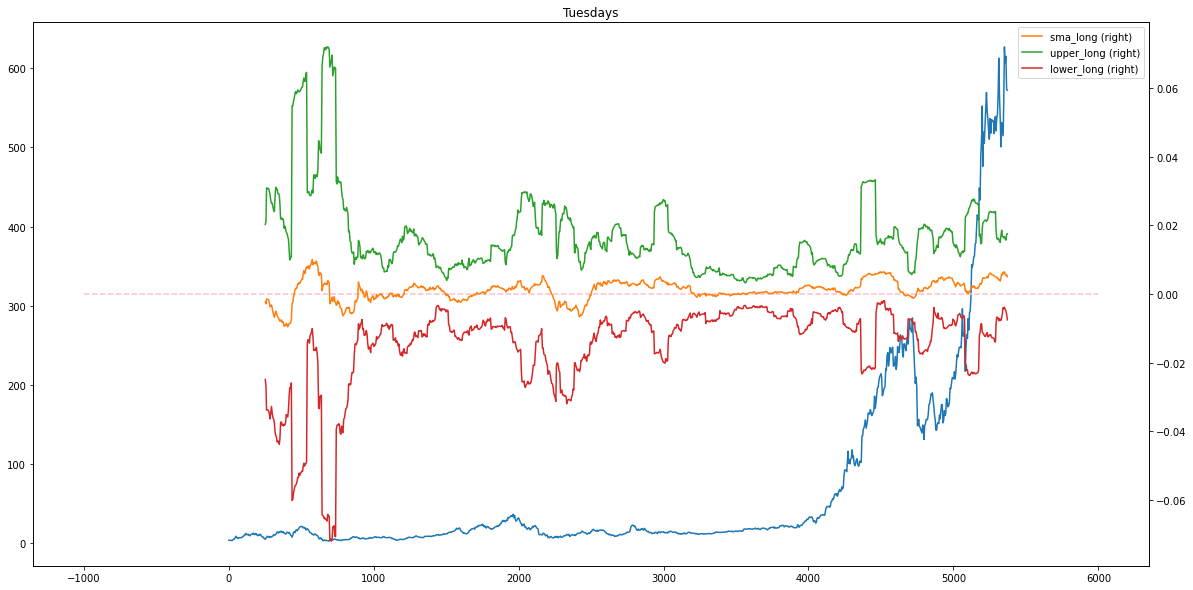

In [106]:
plot_weekday(calculate_weekday(data, 1), 'Tuesdays')

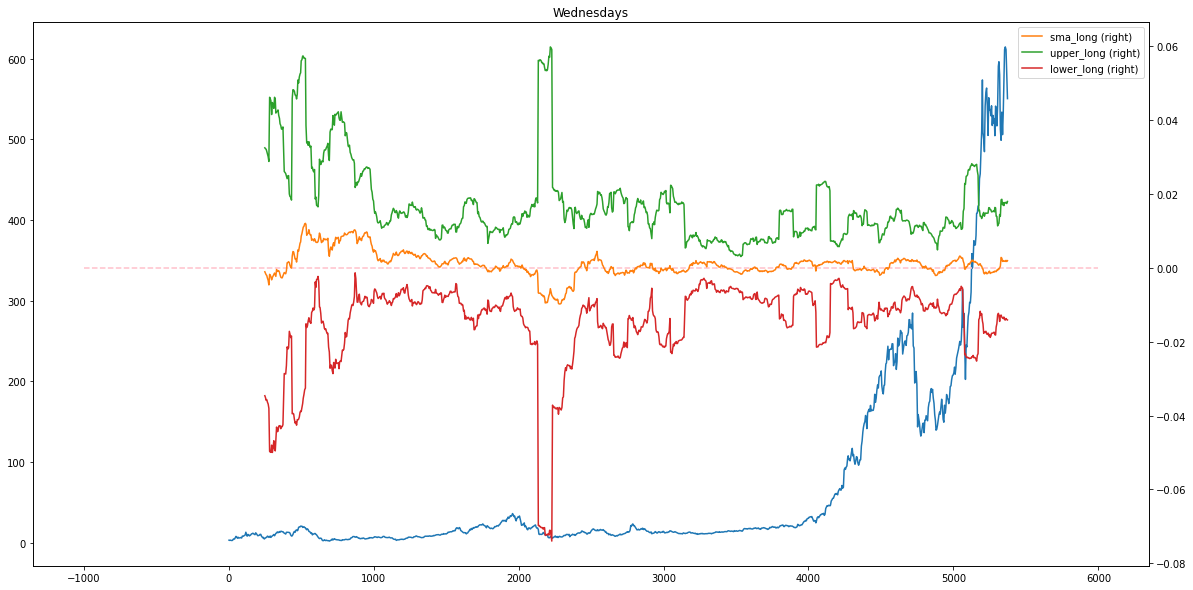

In [107]:
plot_weekday(calculate_weekday(data, 2), 'Wednesdays')

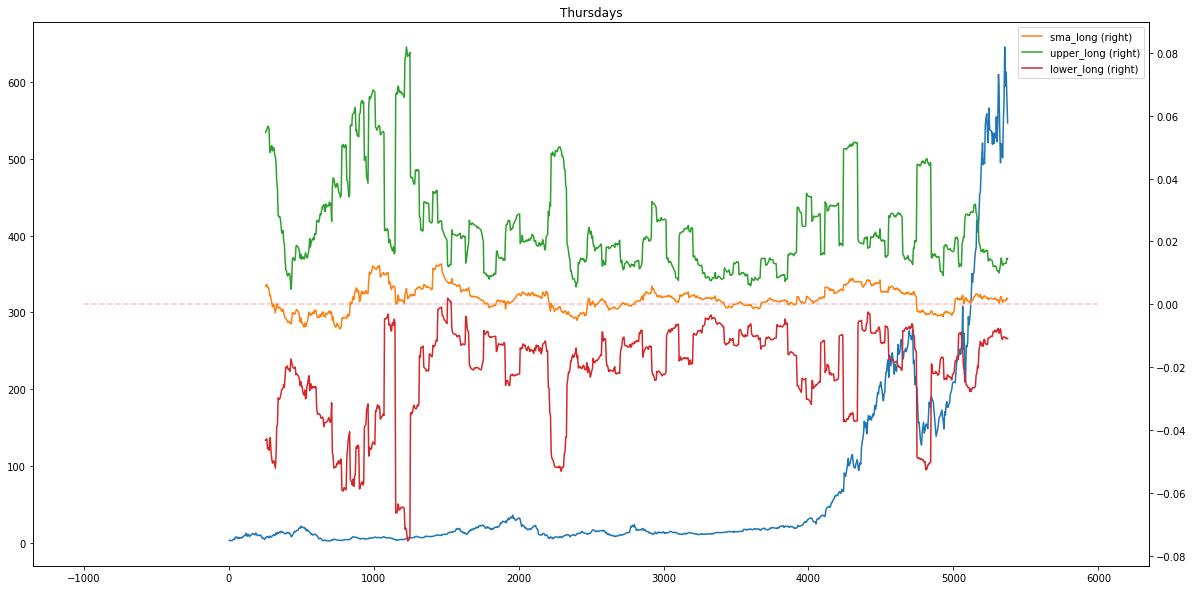

In [108]:
plot_weekday(calculate_weekday(data, 3), 'Thursdays')

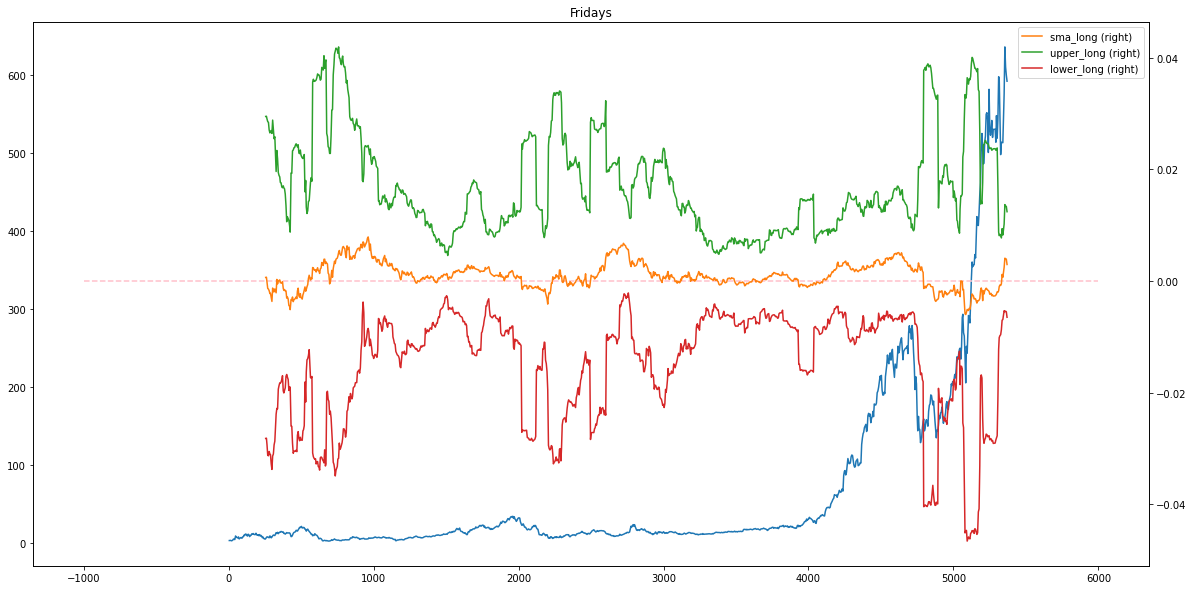

In [109]:
plot_weekday(calculate_weekday(data, 4), 'Fridays')